In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [56]:
# Load dataset (after downloading from Kaggle)
df = pd.read_csv(r"C:\Users\bbuser\Downloads\Student_Performance.csv")

In [57]:
print(df.shape)          

(10000, 6)


In [58]:
print(df.info())         # datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


In [59]:
df


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [60]:
print(df.head())         # first 5 rows

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [61]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 127


In [62]:
# Summary of numerical features
print(df.describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

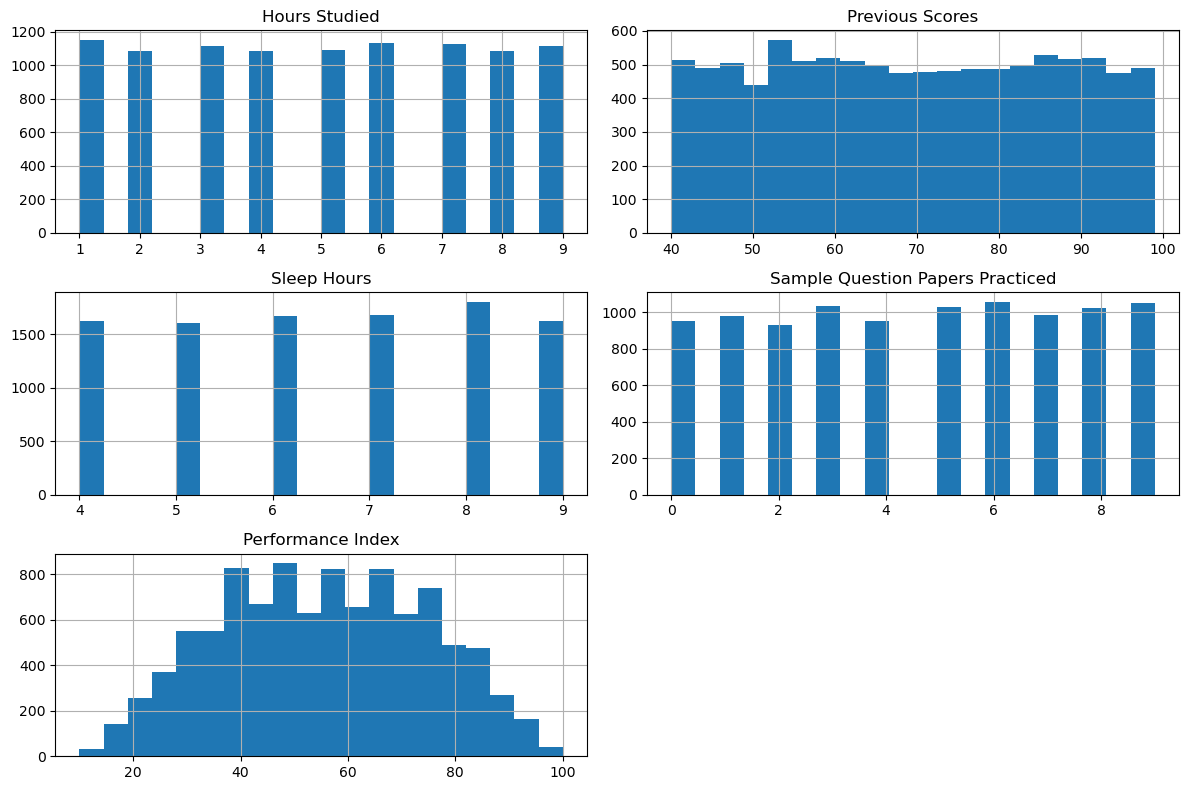

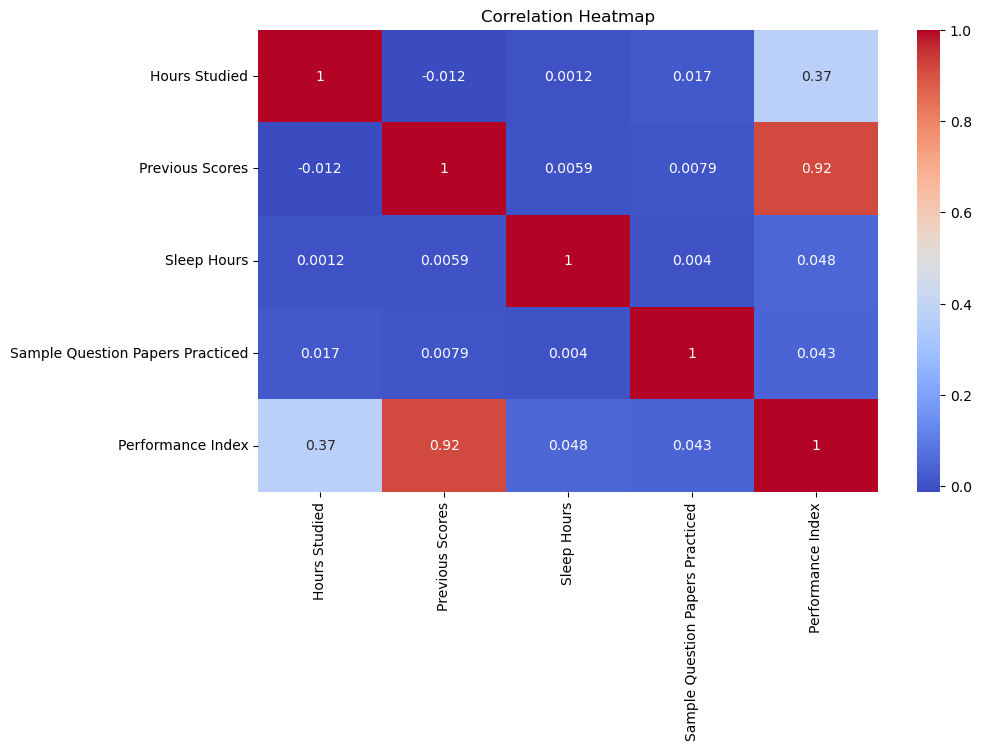

In [63]:
# Histograms for numeric features
df.select_dtypes(include=['number']).hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


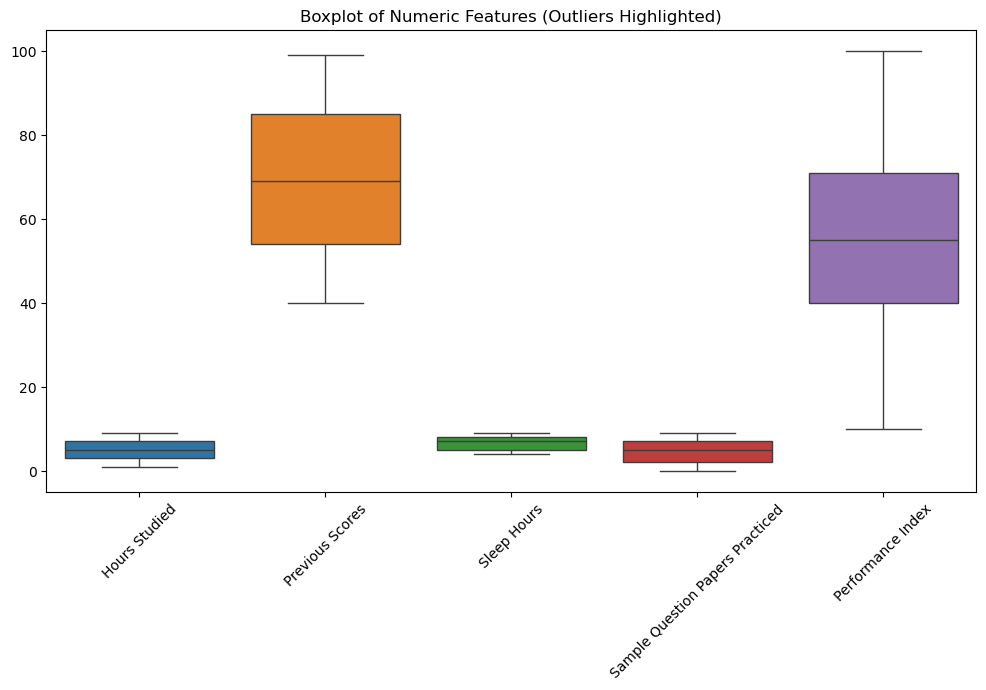

In [64]:
# Boxplots for all numeric features (A boxplot shows the median, quartiles, and potential outliers (points outside whiskers).)
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot of Numeric Features (Outliers Highlighted)")
plt.xticks(rotation=45)
plt.show()


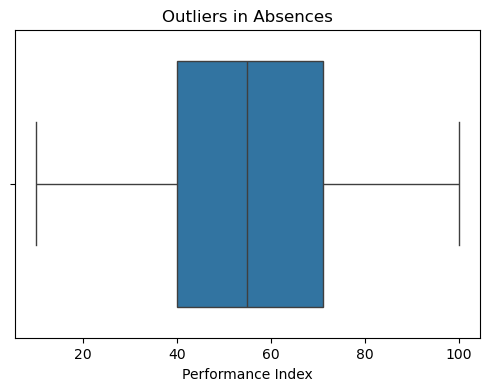

In [65]:
#Boxplot for a Single Column ( Performance Index)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Performance Index"])
plt.title("Outliers in Absences")
plt.show()


In [66]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Target = Performance (adjust if the column has a different name)
X = df_encoded.drop("Performance Index", axis=1)
y = df_encoded["Performance Index"]


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (8000, 5)
Test shape: (2000, 5)


In [68]:
# Initialize model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)


                            Feature  Coefficient
0                     Hours Studied     2.852484
1                   Previous Scores     1.016988
4    Extracurricular Activities_Yes     0.608617
2                       Sleep Hours     0.476941
3  Sample Question Papers Practiced     0.191831


In [69]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 4.082628398521856
RMSE: 2.0205515085050063
R²: 0.9889832909573145
